# Examining the role of the prior

In [1]:
# Point Python to the path where we have installed the bad and darc packages
import sys
sys.path.insert(0, '/Users/btvincent/git-local/darc-experiments-python')

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm

import darc
from darc.delayed import models
from darc.designs import DARCDesign
from darc_parameter_recovery import parameter_recovery_sweep

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [3]:
N = 70
θsweep = pd.DataFrame.from_dict({'logk': np.linspace(-8, -1, num=N), 
                                 'α': np.ones(N) * 2})

In [4]:
target_param_name = 'logk'
max_trials = 16
design_thing = DARCDesign(max_trials=max_trials,
                          RA=list(np.arange(5, 99+1, 1)))
model = models.Hyperbolic(n_particles=5000)
θ_final, θ_all = parameter_recovery_sweep(θsweep, model, design_thing, target_param_name)

starting parameter recovery sweep


/Users/btvincent/git-local/darc-experiments-python/bad/optimisation.py:153: RuntimeWarning: invalid value encountered in true_divide
  (n_times_sampled+n_times_sampled_iter))
/Users/btvincent/git-local/darc-experiments-python/bad/optimisation.py:226: RuntimeWarning: invalid value encountered in true_divide
  (n_times_sampled + n_times_sampled_iter))


`θ_all` is now a list of dataframes. Each item in the list is one simulation with a true `logk` parameter value. Each dataframe contains ths summary stats for all trials (rows).

A function to extract what I want in order to do the appropriate plotting

In [5]:
def get_what_I_want(trial):
    '''Build a dataframe. Each row corresponds to a different true logk parameter
    simulated experiment and contains summary stats information.'''

    what_i_want = []
    for nth_run in range(len(θ_all)):
        what_i_want.append(θ_all[nth_run].iloc[[trial]])

    return pd.concat(what_i_want)  

## Plotting

In [6]:
def my_errorbar(ax, θsweep, θ_estimated):
    
    err_lower = θ_estimated['logk_median'] - θ_estimated['logk_lower95']
    err_upper = θ_estimated['logk_upper95'] - θ_estimated['logk_median']
        
    ax.plot([-8, -1], [-8, -1], c=[0.7, 0.7, 0.7])
    ax.errorbar(x=θsweep['logk'], 
                y=θ_estimated['logk_median'],
                yerr=[err_lower, err_upper],
                fmt='o',
                c='k', 
                ms=3)
    ax.set_xlabel(r'true $\log(k)$')
    ax.set_ylabel(r'estimated $\log(k)$')
    return

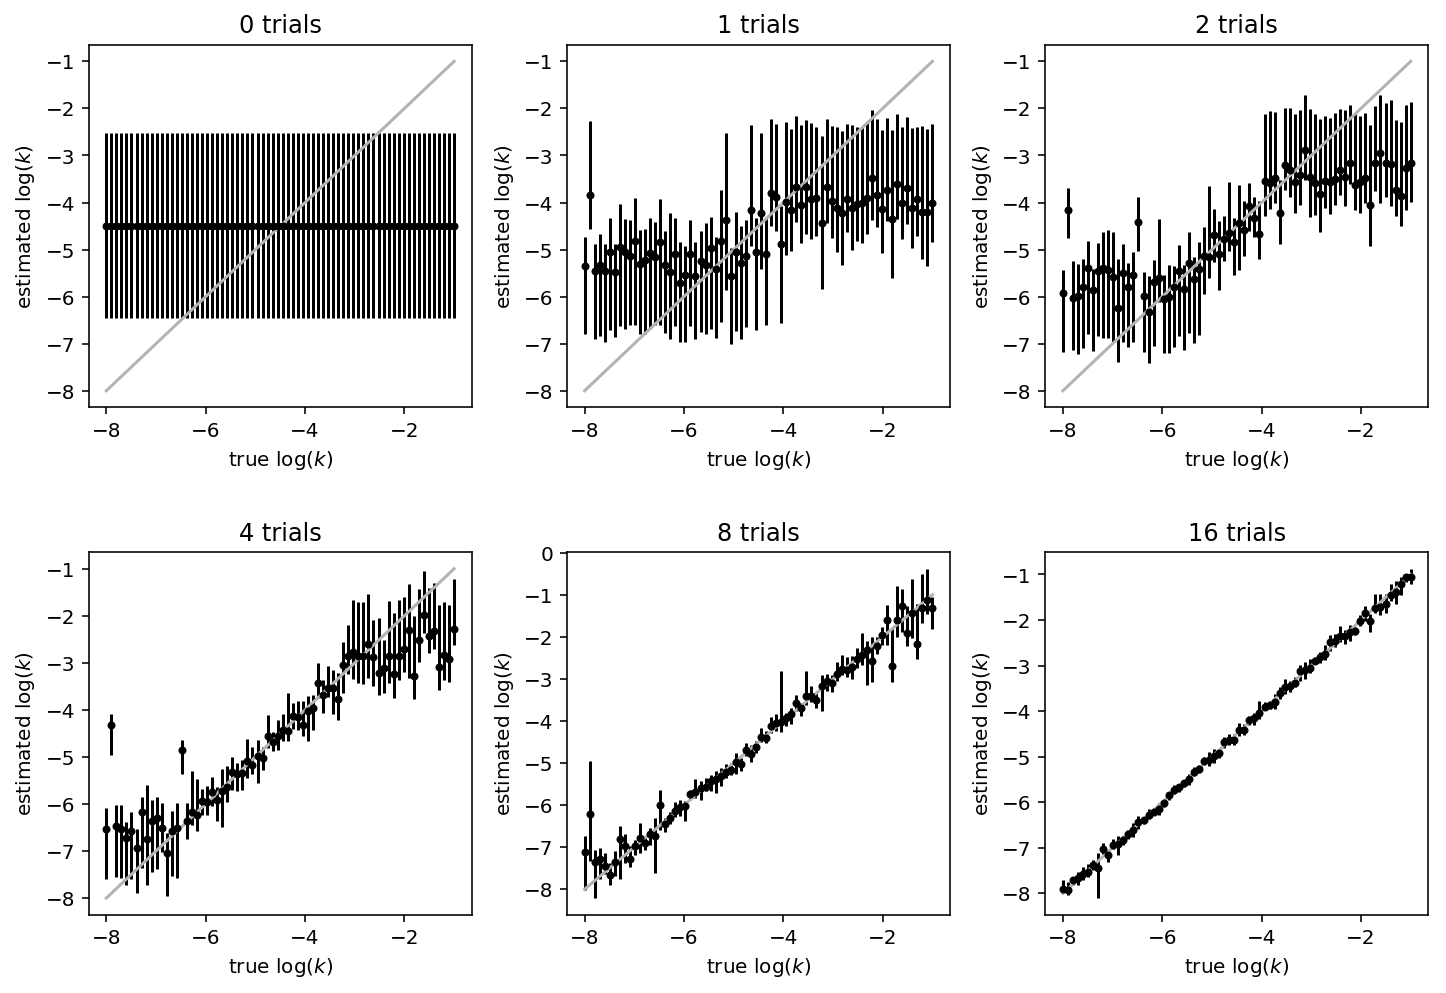

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(12,8))

trials = [0, 1, 2, 4, 8, 16]

for ax, trial in zip(axes.reshape(-1), trials):
    θ_estimated_for_given_trial = get_what_I_want(trial)
    my_errorbar(ax, θsweep, θ_estimated_for_given_trial)
    ax.set_title(f'{trial} trials')

plt.subplots_adjust(hspace=0.4, wspace=0.25)
fig.savefig('role_of_prior.pdf', bbox_inches='tight')